In [40]:
!pip install alibi

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2,f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from alibi.explainers.ale import plot_ale
from sklearn.inspection import permutation_importance
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor  # For regression tasks, or GradientBoostingClassifier for classification
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb


In [49]:
df = pd.read_csv("/content/data.csv")
df

,Unnamed: 0.1,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days,Hights_Sales
0,0,0,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-1.905541,-0.852755,-0.957784,0.901562,0.0,0.690145,-0.522427,1
1,1,1,-0.203147,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,-0.747025,-0.348194,-0.957784,0.901562,0.0,0.690145,-0.522427,1
2,2,2,0.705444,-0.855104,0.0,0.090866,0.609512,0.0,0.345650,0.0,1.570008,0.660927,1.521192,-1.252827,0.0,0.690145,1.756472,1
3,3,3,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,1.670048,-0.957784,0.901562,0.0,-0.254709,0.617023,1
4,4,4,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,1.570008,2.174609,0.143983,0.901562,0.0,-0.254709,0.617023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,4105,1704,0.705444,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.782308,0.0,0.690145,1.756472,0
4106,4106,603,-0.203147,-0.855104,0.0,0.090866,-1.553471,0.0,1.202701,0.0,0.411492,0.156366,-0.957784,-0.653045,0.0,0.690145,0.617023,0
4107,4107,504,0.705444,0.470057,0.0,0.090866,0.609512,0.0,1.202701,0.0,0.411492,-0.852755,-0.957784,-0.435775,0.0,0.690145,0.617023,0
4108,4108,1758,0.705444,0.470057,0.0,0.090866,0.609512,0.0,0.345650,0.0,0.411492,-0.852755,0.143983,-1.053761,0.0,0.217718,1.186748,0


In [50]:
#get the median and make a condation for target col insted of being a continous data(ogistic works on probability values)
median_sales = df['Hights_Sales'].median()
df['Sales'] = (df['Hights_Sales'] >= median_sales).astype(int)

In [51]:
X = df.drop(['Hights_Sales','Sales'], axis=1)
y = df['Sales']

In [52]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [53]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

In [56]:
# Fit the model to the training data
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 3288, number of used features: 12
[LightGBM] [Info] Start training from score 0.492092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMRegressor(random_state=42)

In [57]:
# Predict with the model
y_pred_lgb = lgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [58]:
# Calculate metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

In [59]:
# Print the metrics
print(f'Mean Squared Error (MSE) for LightGBM: {mse_lgb}')
print(f"R-squared for LightGBM: {r2_lgb}")
print(f'Mean Absolute Error (MAE) for LightGBM: {mae_lgb}')

Mean Squared Error (MSE) for LightGBM: 0.009519498523598338
R-squared for LightGBM: 0.9617690104287259
Mean Absolute Error (MAE) for LightGBM: 0.029730848998889708


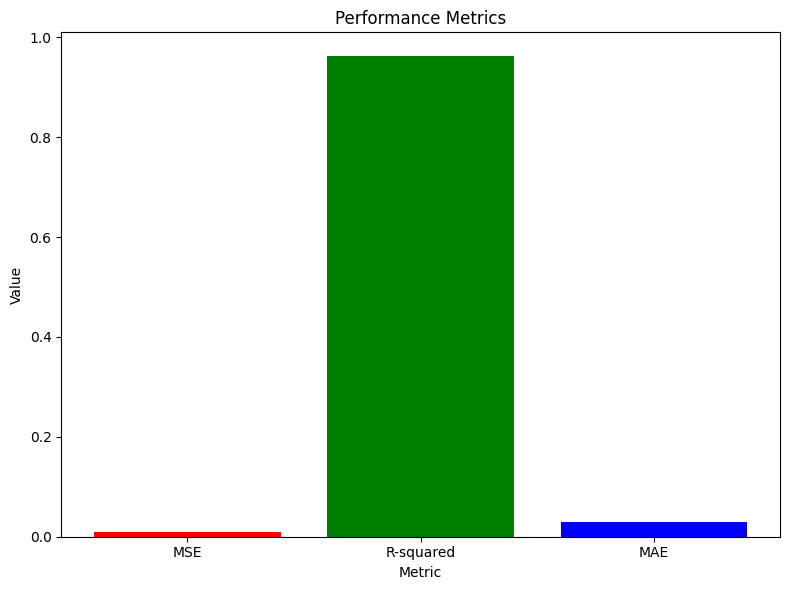

In [60]:
metrics = ['MSE', 'R-squared', 'MAE']
values = [mse_lgb, r2_lgb, mae_lgb]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'green', 'blue'])
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Feature Importance using Permutation Importance:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

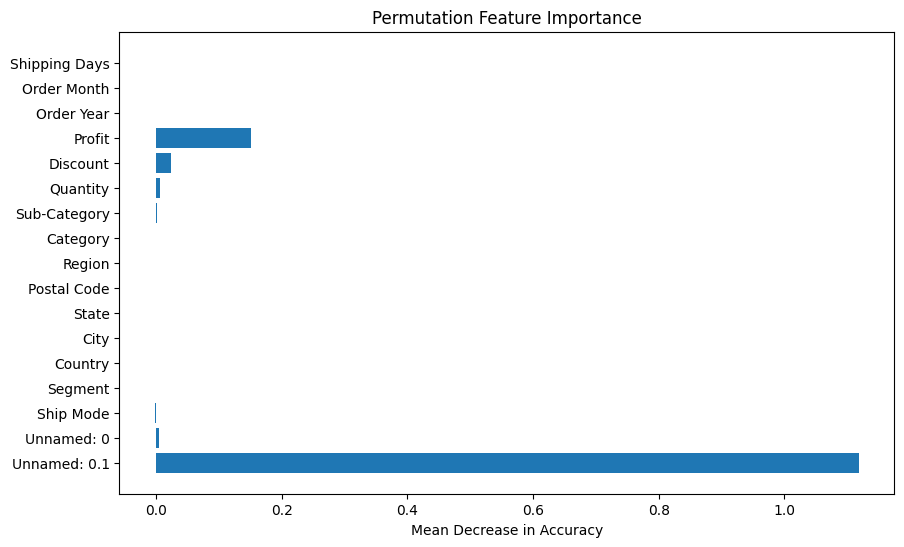

In [61]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(lgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names from before scaling (X_encoded)
feature_names = X_encoded.columns.tolist()

# Plot permutation importance using feature names
plt.figure(figsize=(10, 6))
plt.barh(feature_names, result.importances_mean)
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance')
plt.show()

# Partial Dependence Plots (PDPs):

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

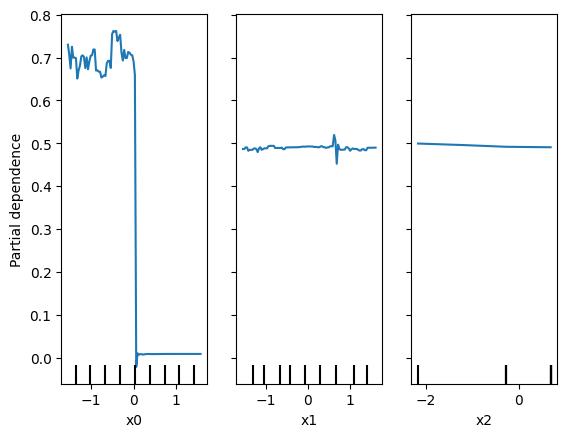

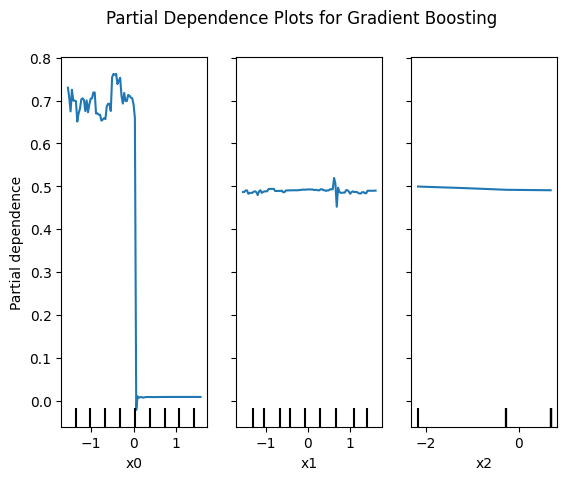

In [62]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [0, 1, 2]  # Replace with indices of important features
pdp_display = PartialDependenceDisplay.from_estimator(
    lgb_model, X_train, features_to_plot
)
pdp_display.plot()
plt.suptitle('Partial Dependence Plots for Gradient Boosting')
plt.show()

# LIME (Local Interpretable Model-agnostic Explanations):

In [45]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 596.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283911 sha256=b1daf823464e2a01a6550bfa1d911115b331977d86ec4fa8594620cdeff0330b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [63]:
from lime.lime_tabular import LimeTabularExplainer # Import LimeTabularExplainer

# Assuming 'gb_model' is your trained model
explainer = LimeTabularExplainer(X_train, training_labels=y_train, mode="regression")
explanation = explainer.explain_instance(X_test[0], lgb_model.predict) # Use gb_model.predict
explanation.show_in_notebook()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#  SHAP

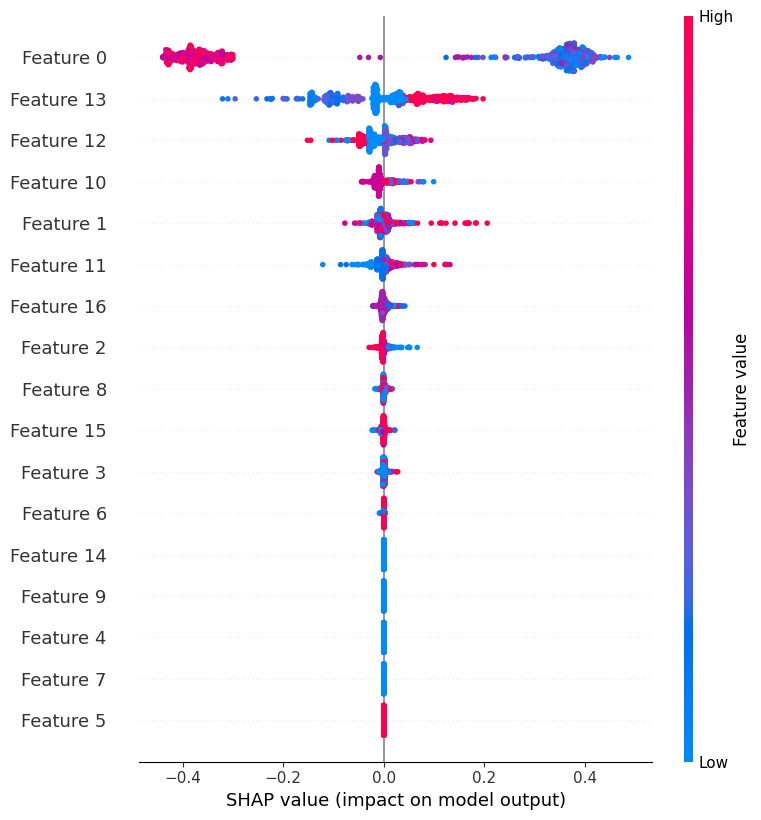

In [64]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test[0,:])
